In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
#from mpltools import style # uncomment for prettier plots
#style.use(['ggplot'])

import OnlineVariance
import DataGenerator
import BinaryStrategy
import PositiveStrategy
import Simulator

In [96]:
arms=3
features=5
rewardType='positive'
#rewardType='binary'
featureType='integer'
#featureType='binary'

# define number of samples and number of choices
num_samples = 10000
num_batches = 100
num_experiments = 3

dg = DataGenerator.DataGenerator(arms,features,feature_type=featureType,reward_type=rewardType)


In [97]:
total_regret = []
total_rmse = []

for e in range(0,num_experiments):
    print "experiment: %d" % e
    
    #appropriate model for reward_type='positive' or reward_type='mixed'
    positiveStrategy = PositiveStrategy.PositiveStrategy(arms,features)
    simulator = Simulator.Simulator(positiveStrategy)

    previous_rmse = 0.
    if previous_rmse == 0:
        initial_rmse = rmse[0][-1]
    
    for b in range(0,num_batches):
        (sample_features, sample_rewards) = dg.generate_samples(num_samples)    
        regret, rmse = simulator.simulate(sample_features, sample_rewards, dg.W)
        
        if previous_rmse == 0:
            initial_rmse = rmse[0][-1]
            previous_rmse = rmse[0][-1]
        #print "\tbatch: %d, started at: %f, now: %f" % (b, abs(initial_rmse), abs(rmse[0][-1]))
        if (len(total_rmse) == 0):
            total_rmse = rmse
            total_regret = regret
        else:
            total_rmse += rmse
            total_regret += regret
#appropriate model for reward_type='binary'
#binaryStrategy = BinaryStrategy.BinaryStrategy(arms,features)
#regret,delta = binaryStrategy.simulate(sample_features,sample_rewards,dg.W)

mean_regret = total_regret / num_experiments
mean_rmse   = total_rmse   / num_experiments


experiment: 0
experiment: 1
experiment: 2


In [93]:
#print dg.W
#print positiveStrategy.mu()
#print sample_rewards
#print np.cumsum(total_regret / num_experiments)

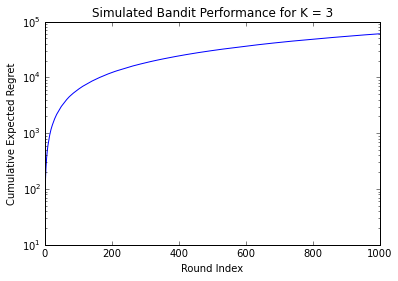

In [94]:
#regret_accumulator = np.cumsum(sample_regret)
#np.cumsum(sample_regret)
plt.semilogy(np.cumsum(mean_regret)/num_experiments)
plt.title('Simulated Bandit Performance for K = ' + str(arms))
plt.ylabel('Cumulative Expected Regret')
plt.xlabel('Round Index')
#plt.legend(('Random','Naive','Epsilon-Greedy','(1 - 1/t) UCB','95% UCB',"thompson", "thomson normal"),loc='lower right')
plt.show()

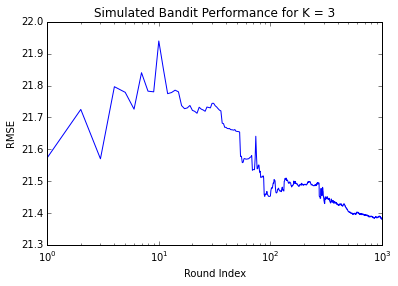

In [95]:
#regret_accumulator = np.cumsum(sample_regret)
#np.cumsum(sample_regret)
plt.semilogx(mean_rmse/num_experiments)
plt.title('Simulated Bandit Performance for K = ' + str(arms))
plt.ylabel('RMSE')
plt.xlabel('Round Index')
#plt.legend(('Random','Naive','Epsilon-Greedy','(1 - 1/t) UCB','95% UCB',"thompson", "thomson normal"),loc='lower right')
plt.show()

In [ ]:
plt.semilogy(regret_accumulator/number_experiments)
plt.title('Simulated Bandit Performance for K = 5')
plt.ylabel('Cumulative Expected Regret')
plt.xlabel('Round Index')
#plt.legend(('Random','Naive','Epsilon-Greedy','(1 - 1/t) UCB','95% UCB',"thompson", "thomson normal"),loc='lower right')
plt.show()

In [7]:
regret_accumulator = np.zeros((num_samples,1))
for i in range(num_experiments):
    print "Running experiment:", i+1
    true_rewards,CTRs_that_generated_data = dg.generate_bernoulli_bandit_data(num_samples)
    regret_accumulator[:,0] += dg.run_bandit_alg(true_rewards,CTRs_that_generated_data,dg.thompson_sampling)

Running experiment: 1
Running experiment: 2


In [8]:
CTRs_that_generated_data

NameError: name 'CTRs_that_generated_data' is not defined

In [23]:
stats = np.empty((arms,features),dtype=object)
for k in range(0,arms):
    for d in range(0,features):
        stats[k,d] = OnlineVariance.OnlineVariance(ddof=0)
F = np.array([0,0,1,1,0])

In [25]:
F * map(lambda x: np.random.normal(x.mean, x.std if x.std > 0 else 1), stats[0])

array([-0.        , -0.        ,  1.20563   , -1.25494569,  0.        ])